# Convolutional Neural Network (CNN) for Cat/Dog Classification

In this notebook, we will build a deep learning Convolutional Neural Network (CNN) model to classify images of cats and dogs. We will use the Pytorch for model creation and training.

### Step 1: Import packages for the notebook

In this step, we import the necessary packages for our task. The essential packages used in this notebook are:

- os: This package provides functions for interacting with the operating system, like file paths and directories.
- numpy as np: NumPy is a fundamental package for scientific computing in Python. We use it for numerical operations and array manipulations.
- torch: This is the PyTorch library, which is a popular deep learning framework for building and training neural networks.
- torch.nn: This module contains all the necessary functions and classes for building neural networks in PyTorch.
- torch.optim: This module contains various optimization algorithms used for training neural networks.
- torch.utils.data.DataLoader: This class is used to load data efficiently for training and validation.
- torchvision.transforms: This module provides common image transformations like resizing, cropping, and normalization.

In [ ]:
# Import packages for the notebook
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets


### Step 2: Create a link to the dataset

In this step, we define the URL to download the dataset. The dataset contains images of cats and dogs and is hosted on GitHub.

In [ ]:
# Create a link to the dataset
file_url = 'https://github.com/PacktWorkshops/The-Deep-Learning-Workshop/raw/master/Chapter03/Datasets/Exercise3.03/cats_and_dogs_filtered.zip'

### Step 3: Download the dataset

In this step, we download the dataset to the 'data' folder using the provided URL. We use the urllib.request.urlretrieve function to download the zip file and zipfile.ZipFile to extract the contents to the 'data' folder.

In [ ]:
# Download the dataset
import urllib.request
import zipfile

# Create a 'data' directory if it doesn't exist
if not os.path.exists('data'):
    os.mkdir('data')

# Download and extract the dataset to the 'data' directory
zip_file_path = 'data/cats_and_dogs.zip'
if not os.path.exists(zip_file_path):
    urllib.request.urlretrieve(file_url, zip_file_path)
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('data')



### Step 4: Create a path variable to cats_and_dogs_filtered directory

In this step, we define the path to the main directory where the extracted dataset is located. This will be used to access the training and validation directories.

In [ ]:
# Create a path variable to cats_and_dogs_filtered directory
path = os.path.join('data', 'cats_and_dogs_filtered')




### Step 5: Create path variables to the train and validation directories

In this step, we define variables that hold the paths to the training and validation data directories. These directories contain subdirectories for cats and dogs images.


In [ ]:
# Create path variables to the train and validation directories
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')



### Step 6: Create path variables to the other directories

In this step, we define additional variables that hold the paths to the subdirectories within the training and validation directories for cats and dogs.


In [ ]:
# Create path variables to the other directories
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')




### Step 7: Create variables to hold train & validation image counts

In this step, we count the total number of images in the training and validation sets. This information will be used later for specifying the number of steps per epoch during training.


In [ ]:
# Create variables to hold train & validation image counts
total_train = len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))
total_val = len(os.listdir(validation_cats_dir)) + len(os.listdir(validation_dogs_dir))





### Step 8: Assign values to three parameter variables

In this step, we set three variables: batch_size, img_height, and img_width. These variables are used to specify the batch size and image dimensions for training and validation data.


In [ ]:
# Assign values to three parameter variables
batch_size = 16
img_height = 100
img_width = 100


### Step 9: Instantiate two ImageDataGenerator classes

In this step, we define two instances of the torchvision.transforms.Compose class. These are used for data preprocessing and data augmentation. The train_transform object contains data augmentation transformations like resizing, normalization, and flipping, while the val_transform object is used for validation data without augmentation.

In [ ]:
# Instantiate two ImageDataGenerator classes
# Note: The data in these two objects will be rescaled (standardized).
train_transform = transforms.Compose([
    transforms.Resize((img_width, img_height)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize
])

val_transform = transforms.Compose([
    transforms.Resize((img_width, img_height)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize
])



### Step 10: Create the training data generator

Here, we create a training data generator using the DataLoader class from PyTorch. This generator will load and preprocess the training data, applying the data augmentation transformations defined in train_transform.


In [ ]:
# Create the training data generator
# Note that we are using the ImageFolder dataset from PyTorch for convenience, which reads images from the specified directories and applies the given transformations.
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)
train_data_gen = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)



### Step 11: Create the validation data generator

Similar to the previous step, we create a validation data generator using the DataLoader class. This generator will load and preprocess the validation data using the val_transform transformations.


In [ ]:
# Create the validation data generator
val_dataset = datasets.ImageFolder(root=validation_dir, transform=val_transform)
val_data_gen = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)


### Show a batch of data

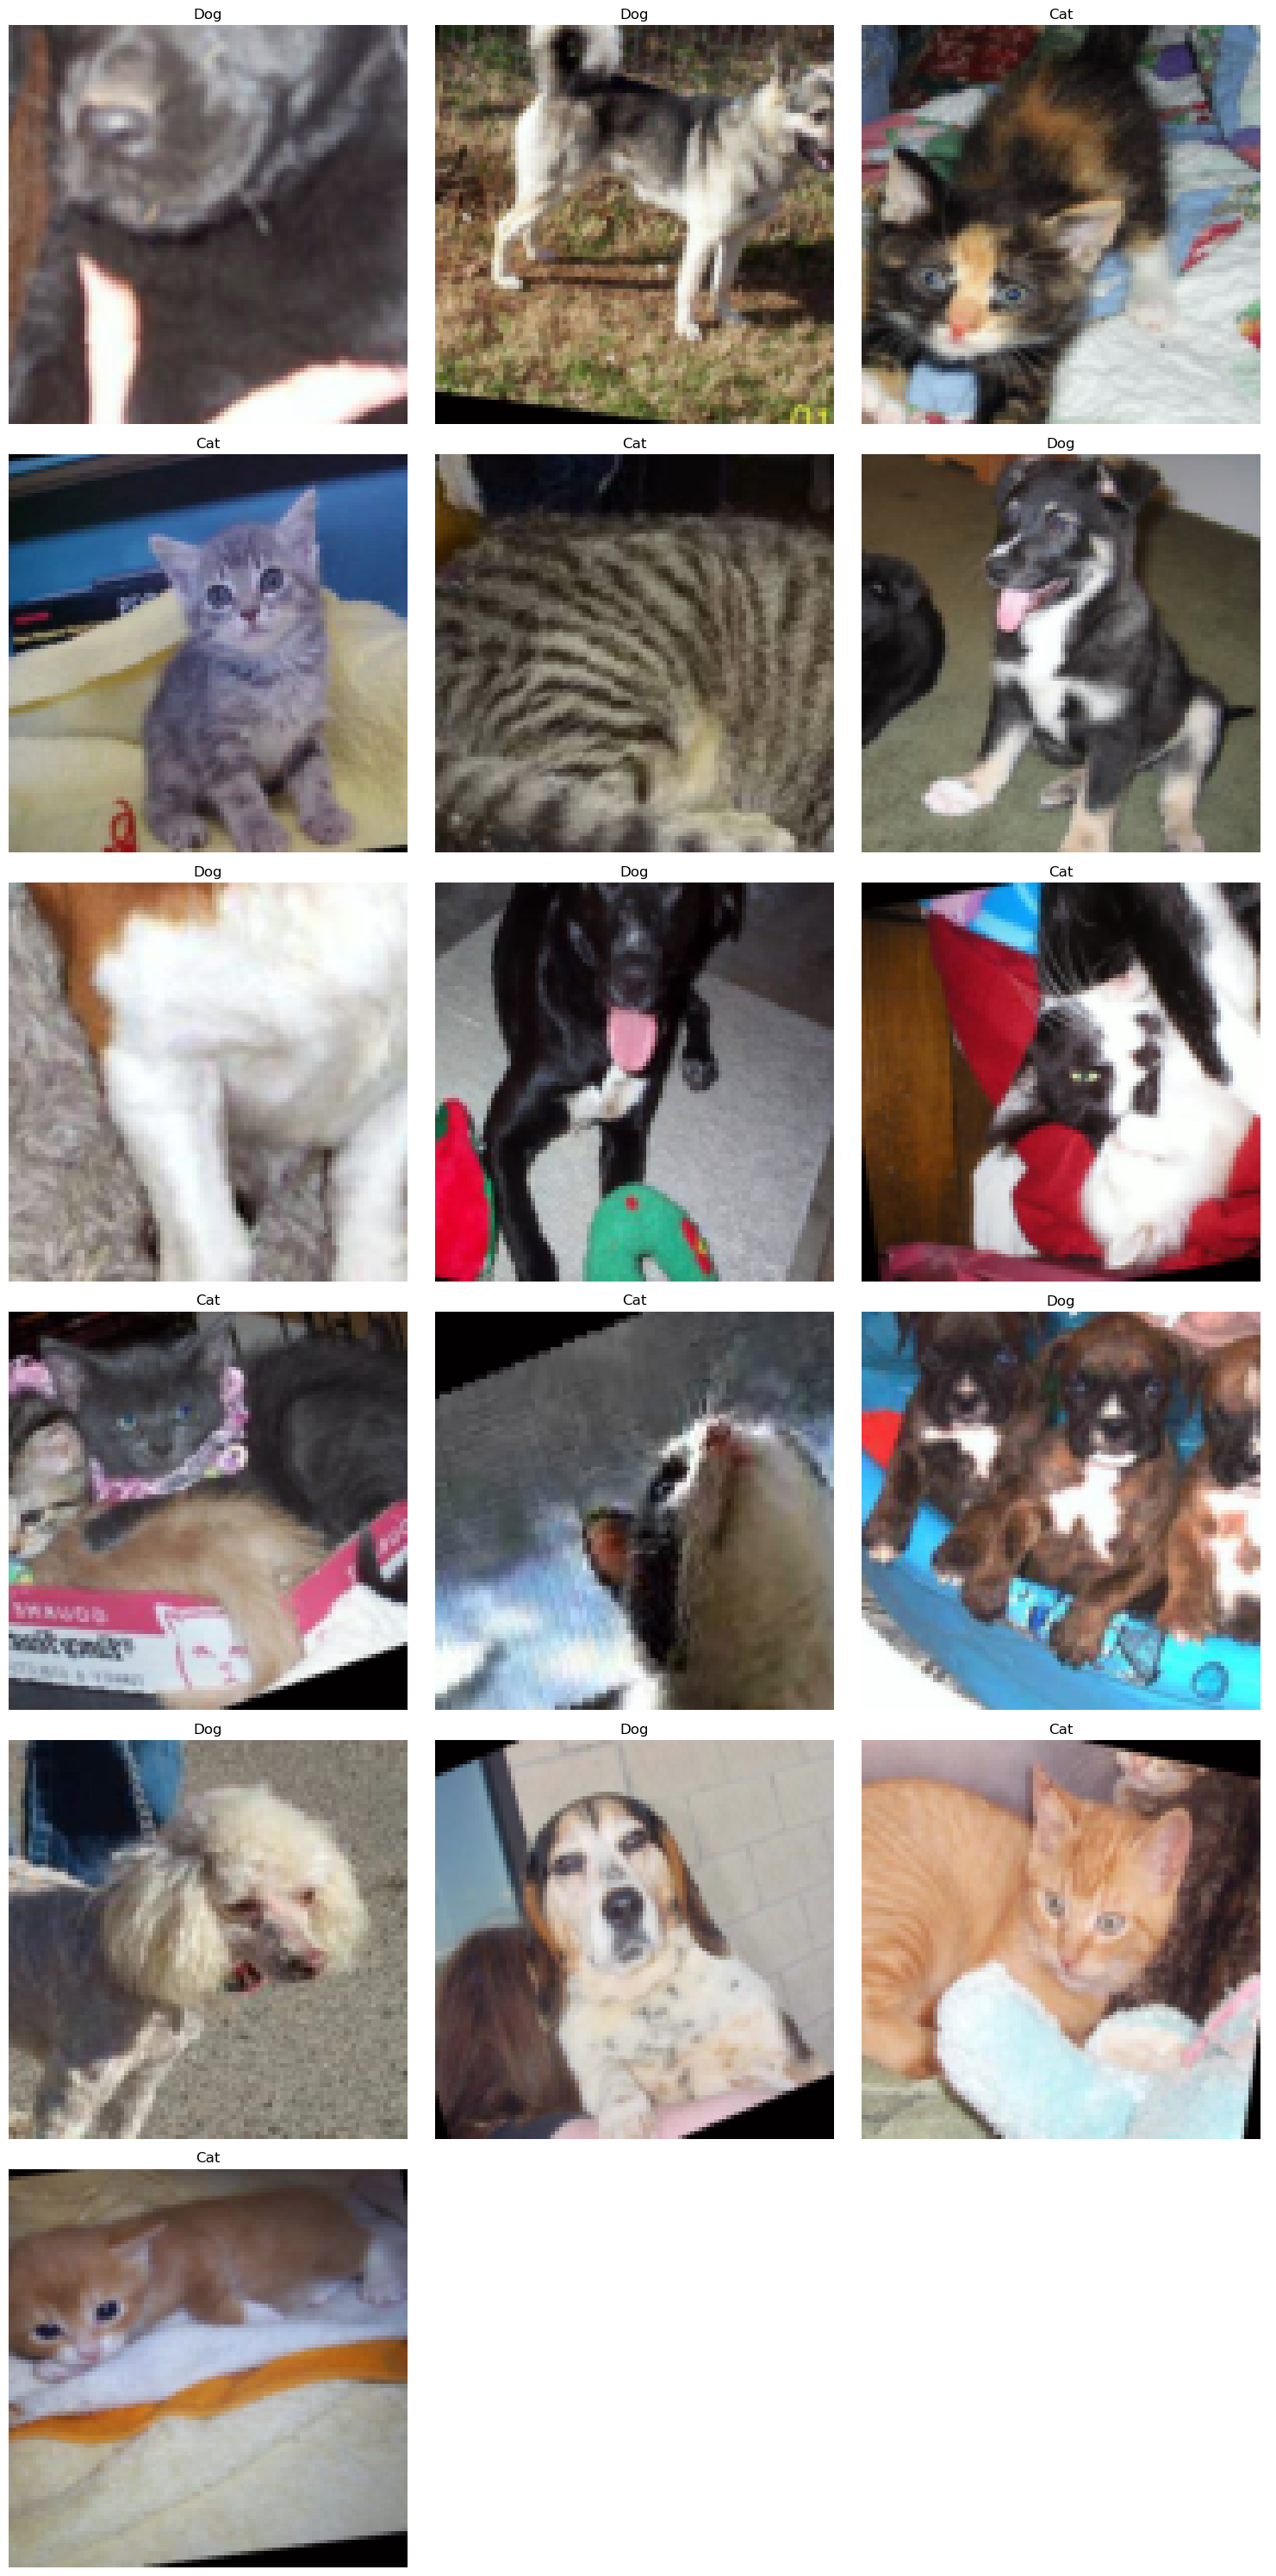

In [ ]:
import matplotlib.pyplot as plt
# Get a batch of data
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Plot the batch of data
num_images = len(images)
num_cols = 3  # Set the number of columns in the plot

# Calculate the number of rows needed to display the images
num_rows = int(np.ceil(num_images / num_cols))


# Create the plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i in range(num_images):
    image = images[i].permute(1, 2, 0)  # Convert from tensor format (C, H, W) to image format (H, W, C)
    image = (image * 0.225) + np.array([0.485, 0.456, 0.406])  # Inverse normalization
    image = np.clip(image, 0, 1)  # Clip pixel values to [0, 1] range
    label = 'Dog' if labels[i] == 1 else 'Cat'
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(image)
    axes[row, col].set_title(label)
    axes[row, col].axis('off')

# Hide any empty subplots
for i in range(num_images, num_rows*num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()


### Step 12: Set random seeds for repeatability

In deep learning, we often use random processes like weight initialization and data shuffling. To ensure reproducibility of the results, it is essential to set random seeds for random number generators. Here, we set random seeds for NumPy and Torch to have consistent results across runs.


In [ ]:
# Set random seeds for repeatability
np.random.seed(8)
torch.manual_seed(8)



### Step 13: Create our model

In this step, we define our convolutional neural network (CNN) model using the nn.Sequential class from PyTorch. The model consists of two convolutional layers with ReLU activation and max-pooling, followed by two fully connected layers with ReLU activation and a final sigmoid activation for binary classification (cat or dog).


In [ ]:
# The model consists of several convolutional layers, followed by max-pooling layers, and fully connected layers for classification.
# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool1(self.relu(self.conv1(x)))
        x = self.pool2(self.relu(self.conv2(x)))
        x = self.pool3(self.relu(self.conv3(x)))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x




### Step 14: Set the optimizer and learning rate

In this step, we define the optimizer for the model using the Adam optimizer from torch.optim. The optimizer is responsible for updating the model's parameters during training to minimize the loss. We also specify the learning rate as a hyperparameter for the optimizer.


In [ ]:
# Set the optimizer and learning rate
model = CNNModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)



### Step 15: Define the loss function

In this step, we define the loss function used for training the model. Since this is a binary classification task, we use Binary Cross Entropy Loss (BCELoss in PyTorch) as the appropriate loss function.


In [ ]:
# Define the loss function
criterion = nn.BCELoss()



### Step 16: Display the model summary

In this step, we display a summary of our CNN model using print(model). This gives us insights into the architecture of the model, the number of parameters in each layer, and the total number of trainable parameters.


In [ ]:
# Display the model summary
print(model)


CNNModel(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=36864, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)



### Step 17: Training Loop

Here, we start the training loop. We move the model to the GPU if available and then iterate over the training data for a specified number of epochs. In each epoch, we perform the following steps:

Zero the gradients of the model parameters.
Perform a forward pass through the model to get the predictions.
Calculate the loss between the predictions and the ground truth labels.
Perform backpropagation to compute the gradients of the model's parameters.
Update the model's parameters using the optimizer.
We also calculate the training accuracy at the end of each epoch.


In [ ]:
# Training Loop
# Move the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    corrects = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.view(-1), labels.float())
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        preds = torch.round(outputs).view(-1)
        corrects += torch.sum(preds == labels)

    epoch_loss = running_loss / len(train_dataset)
    epoch_accuracy = corrects.double() / len(train_dataset)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")


Epoch 1/5, Loss: 0.7033, Accuracy: 0.5285
Epoch 2/5, Loss: 0.6857, Accuracy: 0.5355
Epoch 3/5, Loss: 0.6770, Accuracy: 0.5680



### Step 18: Validation Loop

In this step, we evaluate the model's performance on the validation data. We use the validation data generator to iterate over the validation dataset, and for each batch, we calculate the accuracy of the model's predictions against the ground truth labels.

Finally, we print the validation accuracy, which gives us an estimate of how well our model generalizes to new, unseen data.

With these steps, we have successfully trained a CNN model for classifying cats and dogs using PyTorch. Additionally, we utilized data augmentation to increase the diversity of the training data and improve the model's performance and generalization capabilities.

In [ ]:
# Validation Loop
model.eval()
with torch.no_grad():
    val_correct = 0
    val_samples = 0

    for inputs, labels in val_data_gen:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        predicted = (outputs >= 0.5).squeeze().long()
        val_correct += (predicted == labels).sum().item()
        val_samples += labels.size(0)

    val_accuracy = val_correct / val_samples
    print(f"Validation Accuracy: {val_accuracy:.4f}")

## Exercise: Improving the Model with Data Augmentation

In the current implementation, we trained the CNN model using a limited amount of data, which could lead to overfitting. To address this limitation and improve the model's performance, we can utilize data augmentation techniques to generate additional training images. Data augmentation involves applying random transformations, such as rotation, flipping, zooming, and shifting, to the original images, creating variations of the training data.

In this exercise, you will implement data augmentation using the torchvision.transforms module from PyTorch. Your task is to modify the data preprocessing and augmentation steps (Step 8) and the training and validation data generators (Steps 10 and 11) to include data augmentation.

Follow these steps to implement data augmentation:

- Step 1: Update Data Preprocessing and Augmentation

Import the required modules from torchvision.transforms.
Modify the train_transform object to include data augmentation techniques, such as random rotation, horizontal flipping, and random resized crop.
Keep the val_transform object as it is since we don't perform data augmentation on the validation data.
- Step 2: Update Training Data Generator

Replace the current train_data_gen with a new data generator using the modified train_transform.
Adjust the batch size and other parameters as needed.
- Step 3: Run the Model Training

Re-run the training loop with the updated data generator.
Observe how data augmentation impacts the model's training process and its accuracy on the training and validation datasets.
- Step 4: Experiment with Different Augmentation Techniques

To further enhance the model's performance, try different combinations of data augmentation techniques and observe their effects on the model's accuracy and generalization.
Experiment with additional augmentation options like random vertical flipping, color jittering, or brightness adjustments.
By implementing data augmentation and experimenting with different augmentation techniques, you can improve your CNN model's performance and achieve better accuracy on the validation dataset. Keep in mind that the choice of augmentation techniques depends on the specific problem and dataset characteristics, so it's essential to find the right balance between data diversity and model generalization. Happy experimenting!






In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Set random seeds for reproducibility
np.random.seed(8)
torch.manual_seed(8)

# Define the data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomRotation(20),
        transforms.RandomResizedCrop(100),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize((100, 100)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Set the data directories
data_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')

# Create dataset objects using torchvision.datasets.ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(validation_dir, transform=data_transforms['validation'])

# Create DataLoader objects
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Define the CNN model
class CustomCNNModel(nn.Module):
    def __init__(self):
        super(CustomCNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool1(self.relu(self.conv1(x)))
        x = self.pool2(self.relu(self.conv2(x)))
        x = self.pool3(self.relu(self.conv3(x)))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Create the model and set the optimizer
model = CustomCNNModel()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Reduced learning rate for faster convergence

# Define the loss function
criterion = nn.BCELoss()

# Training loop
num_epochs = 50
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    corrects = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.view(-1), labels.float())
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        preds = torch.round(outputs).view(-1)
        corrects += torch.sum(preds == labels)

    epoch_loss = running_loss / len(train_dataset)
    epoch_accuracy = corrects.double() / len(train_dataset)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

# Validation loop
model.eval()
val_corrects = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.round(outputs).view(-1)
        val_corrects += torch.sum(preds == labels)

val_accuracy = val_corrects.double() / len(val_dataset)
print(f"Validation Accuracy: {val_accuracy:.4f}")


Epoch 1/5, Loss: 0.7033, Accuracy: 0.5285
Epoch 2/5, Loss: 0.6857, Accuracy: 0.5355
Epoch 3/5, Loss: 0.6770, Accuracy: 0.5680
Epoch 4/5, Loss: 0.6708, Accuracy: 0.5740
Epoch 5/5, Loss: 0.6601, Accuracy: 0.5895
Validation Accuracy: 0.6450


# References & resources

Pytorch resources and tutorials: https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html

“[Understanding Convolution in Deep Learning](http://timdettmers.com/2015/03/26/convolution-deep-learning/)” Dettmers, Tim. TD Blog, 26 Mar 2015.
“[Feature extraction using convolution](http://deeplearning.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/)” Ng, Andrew, Ngiam, Jiquan, Yu Foo, Chuan, Mai, Yifan, Suen, Caroline. UFLDL Tutorial. Stanford Deep Learning, 8 Apr 2013.
- [The Scientist and Engineer’s Guide to Digital Signal Processing Smith, Steven](http://www.dspguide.com/pdfbook.htm). Copyright © 1997-1998

- [Udacity Course](https://www.udacity.com/course/deep-learning-nanodegree--nd101):
  - [GitHub](https://github.com/udacity/deep-learning-v2-pytorch/blob/master/convolutional-neural-networks) resources
- CNN workshop: https://github.com/PracticumAI/cnn/tree/main
- [Visualizing and Understanding Deep Neural Networks](https://www.youtube.com/watch?v=ghEmQSxT6tw) by Matt Zeiler
- [Deep Learning in a Nutshell:](https://devblogs.nvidia.com/parallelforall/deep-learning-nutshell-core-concepts/) Core Concepts” Dettmers, Tim. Parallel For All. NVIDIA, 3 Nov 2015.

[1] An Introduction to Convolutional Neural Networks https://arxiv.org/abs/1511.08458

[2] Vincent Dumoulin, Francesco Visin - A guide to convolution arithmetic for deep learning https://arxiv.org/abs/1603.07285

©2022 Shadi Albarqouni Lectures. Professor of Computational Medical Imaging Research at University of Bonn | AI Young Investigator Group Leader at Helmholtz AI